# Time Series

In [1]:
import numpy as np
import pandas as pd
np.random.seed(12345)
import matplotlib.pyplot as plt
plt.rc('figure', figsize=(10, 6))
PREVIOUS_MAX_ROWS = pd.options.display.max_rows
pd.options.display.max_rows = 20
np.set_printoptions(precision=4, suppress=True)

## Date and Time Data Types and Tools

In [5]:
from datetime import datetime
now = datetime.now()
print(now)
now.year, now.month, now.day

2019-04-29 23:27:34.152562


(2019, 4, 29)

In [6]:
delta = datetime(2011, 1, 7) - datetime(2008, 6, 24, 8, 15)
print(delta)
print(delta.days)
delta.seconds

926 days, 15:45:00
926


56700

In [7]:
from datetime import timedelta
start = datetime(2011, 1, 7)
start + timedelta(12)


datetime.datetime(2011, 1, 19, 0, 0)

In [8]:
start - 2 * timedelta(12)

datetime.datetime(2010, 12, 14, 0, 0)

### Converting Between String and Datetime

 * `str` or `strftime` to convert datetime to strings. 
 
 * `strptime` to convert str to time
 
 * `parse` to parse the datetime format automatically
 
 * `to_datetime` to parse different kinds of date representations

In [10]:
stamp = datetime(2011, 1, 3)
# convert to strings with str or strftime 
print(str(stamp))
stamp.strftime('%Y-%m-%d')

2011-01-03 00:00:00


'2011-01-03'

In [11]:
value = '2011-01-03'
datetime.strptime(value, '%Y-%m-%d')
datestrs = ['7/6/2011', '8/6/2011']
[datetime.strptime(x, '%m/%d/%Y') for x in datestrs]

[datetime.datetime(2011, 7, 6, 0, 0), datetime.datetime(2011, 8, 6, 0, 0)]

In [12]:
from dateutil.parser import parse
parse('2011-01-03')

datetime.datetime(2011, 1, 3, 0, 0)

In [13]:
parse('Jan 31, 1997 10:45 PM')

datetime.datetime(1997, 1, 31, 22, 45)

In [14]:
parse('6/12/2011', dayfirst=True)

datetime.datetime(2011, 12, 6, 0, 0)

In [15]:
datestrs = ['2011-07-06 12:00:00', '2011-08-06 00:00:00']
pd.to_datetime(datestrs)

DatetimeIndex(['2011-07-06 12:00:00', '2011-08-06 00:00:00'], dtype='datetime64[ns]', freq=None)

In [17]:
idx = pd.to_datetime(datestrs + [None])
print(idx)
print(idx[2])
pd.isnull(idx)

DatetimeIndex(['2011-07-06 12:00:00', '2011-08-06 00:00:00', 'NaT'], dtype='datetime64[ns]', freq=None)
NaT


array([False, False,  True])

## Time Series Basics

In [18]:
from datetime import datetime
dates = [datetime(2011, 1, 2), datetime(2011, 1, 5),
         datetime(2011, 1, 7), datetime(2011, 1, 8),
         datetime(2011, 1, 10), datetime(2011, 1, 12)]
ts = pd.Series(np.random.randn(6), index=dates)
ts

2011-01-02   -0.204708
2011-01-05    0.478943
2011-01-07   -0.519439
2011-01-08   -0.555730
2011-01-10    1.965781
2011-01-12    1.393406
dtype: float64

In [19]:
ts.index

DatetimeIndex(['2011-01-02', '2011-01-05', '2011-01-07', '2011-01-08',
               '2011-01-10', '2011-01-12'],
              dtype='datetime64[ns]', freq=None)

In [21]:
# arithmetic operation of orig ts and a new modified ts 
print(ts[::2])
# align on dates 
ts + ts[::2]

2011-01-02   -0.204708
2011-01-07   -0.519439
2011-01-10    1.965781
dtype: float64


2011-01-02   -0.409415
2011-01-05         NaN
2011-01-07   -1.038877
2011-01-08         NaN
2011-01-10    3.931561
2011-01-12         NaN
dtype: float64

In [22]:
ts.index.dtype

dtype('<M8[ns]')

In [23]:
# Timestamp object 
stamp = ts.index[0]
stamp

Timestamp('2011-01-02 00:00:00')

### Indexing, Selection, Subsetting

In [24]:
stamp = ts.index[2]
ts[stamp]

-0.5194387150567381

In [27]:
# index by datetime string 
print(ts['1/10/2011'])
ts['20110110']

1.9657805725027142


1.9657805725027142

In [28]:
longer_ts = pd.Series(np.random.randn(1000),
                      index=pd.date_range('1/1/2000', periods=1000))
longer_ts
longer_ts['2001']

2001-01-01    1.599534
2001-01-02    0.474071
2001-01-03    0.151326
2001-01-04   -0.542173
2001-01-05   -0.475496
2001-01-06    0.106403
2001-01-07   -1.308228
2001-01-08    2.173185
2001-01-09    0.564561
2001-01-10   -0.190481
                ...   
2001-12-22    0.000369
2001-12-23    0.900885
2001-12-24   -0.454869
2001-12-25   -0.864547
2001-12-26    1.129120
2001-12-27    0.057874
2001-12-28   -0.433739
2001-12-29    0.092698
2001-12-30   -1.397820
2001-12-31    1.457823
Freq: D, Length: 365, dtype: float64

In [29]:
# all rows with 2001-05
longer_ts['2001-05']

2001-05-01   -0.622547
2001-05-02    0.936289
2001-05-03    0.750018
2001-05-04   -0.056715
2001-05-05    2.300675
2001-05-06    0.569497
2001-05-07    1.489410
2001-05-08    1.264250
2001-05-09   -0.761837
2001-05-10   -0.331617
                ...   
2001-05-22    0.503699
2001-05-23   -1.387874
2001-05-24    0.204851
2001-05-25    0.603705
2001-05-26    0.545680
2001-05-27    0.235477
2001-05-28    0.111835
2001-05-29   -1.251504
2001-05-30   -2.949343
2001-05-31    0.634634
Freq: D, Length: 31, dtype: float64

In [30]:
# slice with datatime objects
ts[datetime(2011, 1, 7):]

2011-01-07   -0.519439
2011-01-08   -0.555730
2011-01-10    1.965781
2011-01-12    1.393406
dtype: float64

In [31]:
# slice a range 
print(ts)
ts['1/6/2011':'1/11/2011']

2011-01-02   -0.204708
2011-01-05    0.478943
2011-01-07   -0.519439
2011-01-08   -0.555730
2011-01-10    1.965781
2011-01-12    1.393406
dtype: float64


2011-01-07   -0.519439
2011-01-08   -0.555730
2011-01-10    1.965781
dtype: float64

In [32]:
# keep only data before a date 
ts.truncate(after='1/9/2011')

2011-01-02   -0.204708
2011-01-05    0.478943
2011-01-07   -0.519439
2011-01-08   -0.555730
dtype: float64

In [34]:
# slice on DataFrame 
dates = pd.date_range('1/1/2000', periods=100, freq='W-WED')
long_df = pd.DataFrame(np.random.randn(100, 4),
                       index=dates,
                       columns=['Colorado', 'Texas',
                                'New York', 'Ohio'])
print(long_df)
long_df.loc['5-2001']

            Colorado     Texas  New York      Ohio
2000-01-05 -0.066748  0.838639 -0.117388 -0.517795
2000-01-12 -0.116696  2.389645 -0.932454 -0.229331
2000-01-19 -1.140330  0.439920 -0.823758 -0.520930
2000-01-26  0.350282  0.204395  0.133445  0.327905
2000-02-02  0.072153  0.131678 -1.297459  0.997747
2000-02-09  0.870955 -0.991253  0.151699  1.266151
2000-02-16 -0.202469  0.050718  0.639869  0.597594
2000-02-23 -0.797246  0.472879  0.522356 -0.546348
2000-03-01 -0.733537  1.302736  0.022199  0.364287
2000-03-08 -0.922839  0.312656 -1.128497 -0.333488
...              ...       ...       ...       ...
2001-09-26 -0.374730  1.765640 -0.214612 -0.309315
2001-10-03  0.359124  0.787222 -0.299719 -0.501940
2001-10-10  0.238768  0.188189 -1.118327  0.386220
2001-10-17  0.224123 -1.359184  1.093890 -1.254319
2001-10-24 -2.925113  0.654578  1.227245  0.401170
2001-10-31 -0.408796  2.152572 -1.971941 -0.582811
2001-11-07 -0.683034 -0.214185 -0.670407  0.096311
2001-11-14 -0.861900  1.120103 

,Colorado,Texas,New York,Ohio
2001-05-02,0.613842,-0.190825,-0.980411,-1.731565
2001-05-09,0.183555,-0.384865,-1.206347,-1.920361
2001-05-16,0.020459,-1.350049,0.411061,1.592783
2001-05-23,1.909133,1.755214,-0.271815,1.290008
2001-05-30,-0.232239,0.428683,-0.723039,0.390677


### Time Series with Duplicate Indices

In [35]:
dates = pd.DatetimeIndex(['1/1/2000', '1/2/2000', '1/2/2000',
                          '1/2/2000', '1/3/2000'])
dup_ts = pd.Series(np.arange(5), index=dates)
dup_ts

2000-01-01    0
2000-01-02    1
2000-01-02    2
2000-01-02    3
2000-01-03    4
dtype: int64

In [36]:
dup_ts.index.is_unique

False

In [37]:
dup_ts['1/3/2000']  # not duplicated
dup_ts['1/2/2000']  # duplicated

2000-01-02    1
2000-01-02    2
2000-01-02    3
dtype: int64

In [38]:
grouped = dup_ts.groupby(level=0)
grouped.mean()
grouped.count()

2000-01-01    1
2000-01-02    3
2000-01-03    1
dtype: int64

## Date Ranges, Frequencies, and Shifting

In [44]:
print(ts)
# fixed daily frequency 
resampler = ts.resample('D')
print('\n resampler', resampler, '\n\n')
for item in resampler:
    print(item)

2011-01-02   -0.204708
2011-01-05    0.478943
2011-01-07   -0.519439
2011-01-08   -0.555730
2011-01-10    1.965781
2011-01-12    1.393406
dtype: float64

 resampler DatetimeIndexResampler [freq=<Day>, axis=0, closed=left, label=left, convention=start, base=0] 


(Timestamp('2011-01-02 00:00:00', freq='D'), 2011-01-02   -0.204708
dtype: float64)
(Timestamp('2011-01-03 00:00:00', freq='D'), Series([], dtype: float64))
(Timestamp('2011-01-04 00:00:00', freq='D'), Series([], dtype: float64))
(Timestamp('2011-01-05 00:00:00', freq='D'), 2011-01-05    0.478943
dtype: float64)
(Timestamp('2011-01-06 00:00:00', freq='D'), Series([], dtype: float64))
(Timestamp('2011-01-07 00:00:00', freq='D'), 2011-01-07   -0.519439
dtype: float64)
(Timestamp('2011-01-08 00:00:00', freq='D'), 2011-01-08   -0.55573
dtype: float64)
(Timestamp('2011-01-09 00:00:00', freq='D'), Series([], dtype: float64))
(Timestamp('2011-01-10 00:00:00', freq='D'), 2011-01-10    1.965781
dtype: float64)
(Timestamp('2011-01-11 00:


### Generating Date Ranges

In [45]:
index = pd.date_range('2012-04-01', '2012-06-01')
index

DatetimeIndex(['2012-04-01', '2012-04-02', '2012-04-03', '2012-04-04',
               '2012-04-05', '2012-04-06', '2012-04-07', '2012-04-08',
               '2012-04-09', '2012-04-10', '2012-04-11', '2012-04-12',
               '2012-04-13', '2012-04-14', '2012-04-15', '2012-04-16',
               '2012-04-17', '2012-04-18', '2012-04-19', '2012-04-20',
               '2012-04-21', '2012-04-22', '2012-04-23', '2012-04-24',
               '2012-04-25', '2012-04-26', '2012-04-27', '2012-04-28',
               '2012-04-29', '2012-04-30', '2012-05-01', '2012-05-02',
               '2012-05-03', '2012-05-04', '2012-05-05', '2012-05-06',
               '2012-05-07', '2012-05-08', '2012-05-09', '2012-05-10',
               '2012-05-11', '2012-05-12', '2012-05-13', '2012-05-14',
               '2012-05-15', '2012-05-16', '2012-05-17', '2012-05-18',
               '2012-05-19', '2012-05-20', '2012-05-21', '2012-05-22',
               '2012-05-23', '2012-05-24', '2012-05-25', '2012-05-26',
      

In [47]:
print(pd.date_range(start='2012-04-01', periods=20))
pd.date_range(end='2012-06-01', periods=20)

DatetimeIndex(['2012-04-01', '2012-04-02', '2012-04-03', '2012-04-04',
               '2012-04-05', '2012-04-06', '2012-04-07', '2012-04-08',
               '2012-04-09', '2012-04-10', '2012-04-11', '2012-04-12',
               '2012-04-13', '2012-04-14', '2012-04-15', '2012-04-16',
               '2012-04-17', '2012-04-18', '2012-04-19', '2012-04-20'],
              dtype='datetime64[ns]', freq='D')


DatetimeIndex(['2012-05-13', '2012-05-14', '2012-05-15', '2012-05-16',
               '2012-05-17', '2012-05-18', '2012-05-19', '2012-05-20',
               '2012-05-21', '2012-05-22', '2012-05-23', '2012-05-24',
               '2012-05-25', '2012-05-26', '2012-05-27', '2012-05-28',
               '2012-05-29', '2012-05-30', '2012-05-31', '2012-06-01'],
              dtype='datetime64[ns]', freq='D')

In [50]:
# last business day of a month
pd.date_range('2019-01-01', '2019-12-01', freq='BM')

DatetimeIndex(['2019-01-31', '2019-02-28', '2019-03-29', '2019-04-30',
               '2019-05-31', '2019-06-28', '2019-07-31', '2019-08-30',
               '2019-09-30', '2019-10-31', '2019-11-29'],
              dtype='datetime64[ns]', freq='BM')

In [51]:
pd.date_range('2012-05-02 12:56:31', periods=5)

DatetimeIndex(['2012-05-02 12:56:31', '2012-05-03 12:56:31',
               '2012-05-04 12:56:31', '2012-05-05 12:56:31',
               '2012-05-06 12:56:31'],
              dtype='datetime64[ns]', freq='D')

In [52]:
pd.date_range('2012-05-02 12:56:31', periods=5, normalize=True)

DatetimeIndex(['2012-05-02', '2012-05-03', '2012-05-04', '2012-05-05',
               '2012-05-06'],
              dtype='datetime64[ns]', freq='D')

### Frequencies and Date Offsets

In [53]:
from pandas.tseries.offsets import Hour, Minute
hour = Hour()
hour

<Hour>

In [54]:
four_hours = Hour(4)
four_hours

<4 * Hours>

In [55]:
pd.date_range('2000-01-01', '2000-01-03 23:59', freq='4h')

DatetimeIndex(['2000-01-01 00:00:00', '2000-01-01 04:00:00',
               '2000-01-01 08:00:00', '2000-01-01 12:00:00',
               '2000-01-01 16:00:00', '2000-01-01 20:00:00',
               '2000-01-02 00:00:00', '2000-01-02 04:00:00',
               '2000-01-02 08:00:00', '2000-01-02 12:00:00',
               '2000-01-02 16:00:00', '2000-01-02 20:00:00',
               '2000-01-03 00:00:00', '2000-01-03 04:00:00',
               '2000-01-03 08:00:00', '2000-01-03 12:00:00',
               '2000-01-03 16:00:00', '2000-01-03 20:00:00'],
              dtype='datetime64[ns]', freq='4H')

In [56]:
Hour(2) + Minute(30)

<150 * Minutes>

In [57]:
pd.date_range('2000-01-01', periods=10, freq='1h30min')

DatetimeIndex(['2000-01-01 00:00:00', '2000-01-01 01:30:00',
               '2000-01-01 03:00:00', '2000-01-01 04:30:00',
               '2000-01-01 06:00:00', '2000-01-01 07:30:00',
               '2000-01-01 09:00:00', '2000-01-01 10:30:00',
               '2000-01-01 12:00:00', '2000-01-01 13:30:00'],
              dtype='datetime64[ns]', freq='90T')

#### Week of month dates

In [58]:
# week of month, 3rd Friday
rng = pd.date_range('2012-01-01', '2012-09-01', freq='WOM-3FRI')
list(rng)

[Timestamp('2012-01-20 00:00:00', freq='WOM-3FRI'),
 Timestamp('2012-02-17 00:00:00', freq='WOM-3FRI'),
 Timestamp('2012-03-16 00:00:00', freq='WOM-3FRI'),
 Timestamp('2012-04-20 00:00:00', freq='WOM-3FRI'),
 Timestamp('2012-05-18 00:00:00', freq='WOM-3FRI'),
 Timestamp('2012-06-15 00:00:00', freq='WOM-3FRI'),
 Timestamp('2012-07-20 00:00:00', freq='WOM-3FRI'),
 Timestamp('2012-08-17 00:00:00', freq='WOM-3FRI')]

### Shifting (Leading and Lagging) Data

In [62]:
ts = pd.Series(np.random.randn(4),
               index=pd.date_range('1/1/2000', periods=4, freq='M'))
print('ts:\n',ts, '\n\n')
ts.shift(2)
ts.shift(-2)

ts:
 2000-01-31    1.059155
2000-02-29    1.232452
2000-03-31    0.175856
2000-04-30   -0.550110
Freq: M, dtype: float64 




2000-01-31    0.175856
2000-02-29   -0.550110
2000-03-31         NaN
2000-04-30         NaN
Freq: M, dtype: float64

In [63]:
ts / ts.shift(1) - 1

2000-01-31         NaN
2000-02-29    0.163619
2000-03-31   -0.857312
2000-04-30   -4.128184
Freq: M, dtype: float64

In [64]:
# also shift the index by specifying the freq 
ts.shift(2, freq='M')

2000-03-31    1.059155
2000-04-30    1.232452
2000-05-31    0.175856
2000-06-30   -0.550110
Freq: M, dtype: float64

In [65]:
print(ts.shift(3, freq='D'))
# shift by 1.5 hrs 
ts.shift(1, freq='90T')

2000-02-03    1.059155
2000-03-03    1.232452
2000-04-03    0.175856
2000-05-03   -0.550110
dtype: float64


2000-01-31 01:30:00    1.059155
2000-02-29 01:30:00    1.232452
2000-03-31 01:30:00    0.175856
2000-04-30 01:30:00   -0.550110
Freq: M, dtype: float64

#### Shifting dates with offsets

 * `rollforward`, `rollbackward`

In [66]:
from pandas.tseries.offsets import Day, MonthEnd
now = datetime(2011, 11, 17)
now + 3 * Day()

Timestamp('2011-11-20 00:00:00')

In [68]:
print(now + MonthEnd())
now + MonthEnd(2)

2011-11-30 00:00:00


Timestamp('2011-12-31 00:00:00')

In [70]:
offset = MonthEnd()
print(offset.rollforward(now))
print(offset.rollback(now))

2011-11-30 00:00:00
2011-10-31 00:00:00


In [72]:
# use together with groupby 
ts = pd.Series(np.random.randn(20),
               index=pd.date_range('1/15/2000', periods=20, freq='4d'))
print(ts)
ts.groupby(offset.rollforward).mean()

2000-01-15    1.019051
2000-01-19    0.211994
2000-01-23   -0.371211
2000-01-27    0.845983
2000-01-31   -0.323343
2000-02-04   -0.138449
2000-02-08    0.721752
2000-02-12    0.501654
2000-02-16    1.086521
2000-02-20   -0.152782
2000-02-24    1.344944
2000-02-28   -0.404058
2000-03-03   -0.138526
2000-03-07   -0.477731
2000-03-11   -0.795727
2000-03-15    0.006938
2000-03-19   -0.172171
2000-03-23   -0.435731
2000-03-27   -1.378678
2000-03-31   -0.289877
Freq: 4D, dtype: float64


2000-01-31    0.276495
2000-02-29    0.422797
2000-03-31   -0.460188
dtype: float64

In [73]:
# or alternatively, use resample 
ts.resample('M').mean()

2000-01-31    0.276495
2000-02-29    0.422797
2000-03-31   -0.460188
Freq: M, dtype: float64

## Time Zone Handling

In [74]:
import pytz
pytz.common_timezones[-5:]

['US/Eastern', 'US/Hawaii', 'US/Mountain', 'US/Pacific', 'UTC']

In [75]:
tz = pytz.timezone('America/New_York')
tz

<DstTzInfo 'America/New_York' LMT-1 day, 19:04:00 STD>

### Time Zone Localization and Conversion

In [76]:
rng = pd.date_range('3/9/2012 9:30', periods=6, freq='D')
ts = pd.Series(np.random.randn(len(rng)), index=rng)
ts

2012-03-09 09:30:00    0.239018
2012-03-10 09:30:00    1.609446
2012-03-11 09:30:00   -0.283876
2012-03-12 09:30:00   -1.323765
2012-03-13 09:30:00    0.343184
2012-03-14 09:30:00    2.094259
Freq: D, dtype: float64

In [77]:
print(ts.index.tz)

None


In [78]:
pd.date_range('3/9/2012 9:30', periods=10, freq='D', tz='UTC')

DatetimeIndex(['2012-03-09 09:30:00+00:00', '2012-03-10 09:30:00+00:00',
               '2012-03-11 09:30:00+00:00', '2012-03-12 09:30:00+00:00',
               '2012-03-13 09:30:00+00:00', '2012-03-14 09:30:00+00:00',
               '2012-03-15 09:30:00+00:00', '2012-03-16 09:30:00+00:00',
               '2012-03-17 09:30:00+00:00', '2012-03-18 09:30:00+00:00'],
              dtype='datetime64[ns, UTC]', freq='D')

In [79]:
ts
ts_utc = ts.tz_localize('UTC')
ts_utc
ts_utc.index

DatetimeIndex(['2012-03-09 09:30:00+00:00', '2012-03-10 09:30:00+00:00',
               '2012-03-11 09:30:00+00:00', '2012-03-12 09:30:00+00:00',
               '2012-03-13 09:30:00+00:00', '2012-03-14 09:30:00+00:00'],
              dtype='datetime64[ns, UTC]', freq='D')

In [80]:
ts_utc.tz_convert('America/New_York')

2012-03-09 04:30:00-05:00    0.239018
2012-03-10 04:30:00-05:00    1.609446
2012-03-11 05:30:00-04:00   -0.283876
2012-03-12 05:30:00-04:00   -1.323765
2012-03-13 05:30:00-04:00    0.343184
2012-03-14 05:30:00-04:00    2.094259
Freq: D, dtype: float64

In [81]:
ts_eastern = ts.tz_localize('America/New_York')
ts_eastern.tz_convert('UTC')
ts_eastern.tz_convert('Europe/Berlin')

2012-03-09 15:30:00+01:00    0.239018
2012-03-10 15:30:00+01:00    1.609446
2012-03-11 14:30:00+01:00   -0.283876
2012-03-12 14:30:00+01:00   -1.323765
2012-03-13 14:30:00+01:00    0.343184
2012-03-14 14:30:00+01:00    2.094259
Freq: D, dtype: float64

In [82]:
ts.index.tz_localize('Asia/Shanghai')

DatetimeIndex(['2012-03-09 09:30:00+08:00', '2012-03-10 09:30:00+08:00',
               '2012-03-11 09:30:00+08:00', '2012-03-12 09:30:00+08:00',
               '2012-03-13 09:30:00+08:00', '2012-03-14 09:30:00+08:00'],
              dtype='datetime64[ns, Asia/Shanghai]', freq='D')

### Operations with Time Zone−Aware Timestamp Objects

In [83]:
stamp = pd.Timestamp('2011-03-12 04:00')
stamp_utc = stamp.tz_localize('utc')
stamp_utc.tz_convert('America/New_York')

Timestamp('2011-03-11 23:00:00-0500', tz='America/New_York')

In [84]:
stamp_moscow = pd.Timestamp('2011-03-12 04:00', tz='Europe/Moscow')
stamp_moscow

Timestamp('2011-03-12 04:00:00+0300', tz='Europe/Moscow')

In [85]:
stamp_utc.value
stamp_utc.tz_convert('America/New_York').value

1299902400000000000

In [86]:
from pandas.tseries.offsets import Hour
stamp = pd.Timestamp('2012-03-12 01:30', tz='US/Eastern')
stamp
stamp + Hour()

Timestamp('2012-03-12 02:30:00-0400', tz='US/Eastern')

In [87]:
stamp = pd.Timestamp('2012-11-04 00:30', tz='US/Eastern')
stamp
stamp + 2 * Hour()

Timestamp('2012-11-04 01:30:00-0500', tz='US/Eastern')

### Operations Between Different Time Zones

In [88]:
rng = pd.date_range('3/7/2012 9:30', periods=10, freq='B')
ts = pd.Series(np.random.randn(len(rng)), index=rng)
ts
ts1 = ts[:7].tz_localize('Europe/London')
ts2 = ts1[2:].tz_convert('Europe/Moscow')
result = ts1 + ts2
result.index

DatetimeIndex(['2012-03-07 09:30:00+00:00', '2012-03-08 09:30:00+00:00',
               '2012-03-09 09:30:00+00:00', '2012-03-12 09:30:00+00:00',
               '2012-03-13 09:30:00+00:00', '2012-03-14 09:30:00+00:00',
               '2012-03-15 09:30:00+00:00'],
              dtype='datetime64[ns, UTC]', freq='B')

## Periods and Period Arithmetic

In [90]:
# annual period 
p = pd.Period(2007, freq='A-DEC')
p

Period('2007', 'A-DEC')

In [92]:
print(p + 5)
p - 2

2012


Period('2005', 'A-DEC')

In [93]:
pd.Period('2014', freq='A-DEC') - p

<7 * YearEnds: month=12>

In [97]:
p.asfreq('M', how = 'start')

Period('2007-01', 'M')

In [94]:

rng = pd.period_range('2000-01-01', '2000-06-30', freq='M')
rng

PeriodIndex(['2000-01', '2000-02', '2000-03', '2000-04', '2000-05', '2000-06'], dtype='period[M]', freq='M')

In [101]:
ts = pd.Series(np.random.randn(6), index=rng)
ts

2000-01    1.227790
2000-02    1.387722
2000-03   -0.344951
2000-04    0.446910
2000-05    0.273077
2000-06   -0.149503
Freq: M, dtype: float64

In [102]:
# want the last business day of each year 
ts.asfreq('B', how = 'end')

2000-01-31    1.227790
2000-02-29    1.387722
2000-03-31   -0.344951
2000-04-28    0.446910
2000-05-31    0.273077
2000-06-30   -0.149503
Freq: B, dtype: float64

In [99]:
values = ['2001Q3', '2002Q2', '2003Q1']
index = pd.PeriodIndex(values, freq='Q-DEC')
index

PeriodIndex(['2001Q3', '2002Q2', '2003Q1'], dtype='period[Q-DEC]', freq='Q-DEC')

### Period Frequency Conversion

In [103]:
p = pd.Period('2007', freq='A-DEC')
p
p.asfreq('M', how='start')
p.asfreq('M', how='end')

Period('2007-12', 'M')

In [104]:
p = pd.Period('2007', freq='A-JUN')
p
p.asfreq('M', 'start')
p.asfreq('M', 'end')

Period('2007-06', 'M')

In [105]:
p = pd.Period('Aug-2007', 'M')
p.asfreq('A-JUN')

Period('2008', 'A-JUN')

In [106]:
rng = pd.period_range('2006', '2009', freq='A-DEC')
ts = pd.Series(np.random.randn(len(rng)), index=rng)
ts
ts.asfreq('M', how='start')

2006-01   -0.702192
2007-01    1.531363
2008-01   -0.245743
2009-01    0.924597
Freq: M, dtype: float64

In [107]:
ts.asfreq('B', how='end')

2006-12-29   -0.702192
2007-12-31    1.531363
2008-12-31   -0.245743
2009-12-31    0.924597
Freq: B, dtype: float64

### Quarterly Period Frequencies

In [108]:
p = pd.Period('2012Q4', freq='Q-JAN')
p

Period('2012Q4', 'Q-JAN')

In [109]:
p.asfreq('D', 'start')
p.asfreq('D', 'end')

Period('2012-01-31', 'D')

In [110]:
p4pm = (p.asfreq('B', 'e') - 1).asfreq('T', 's') + 16 * 60
p4pm
p4pm.to_timestamp()

Timestamp('2012-01-30 16:00:00')

In [111]:
rng = pd.period_range('2011Q3', '2012Q4', freq='Q-JAN')
ts = pd.Series(np.arange(len(rng)), index=rng)
ts
new_rng = (rng.asfreq('B', 'e') - 1).asfreq('T', 's') + 16 * 60
ts.index = new_rng.to_timestamp()
ts

2010-10-28 16:00:00    0
2011-01-28 16:00:00    1
2011-04-28 16:00:00    2
2011-07-28 16:00:00    3
2011-10-28 16:00:00    4
2012-01-30 16:00:00    5
dtype: int64

### Converting Timestamps to Periods (and Back)

In [116]:
rng = pd.date_range('2000-01-01', periods=3, freq='M')
ts = pd.Series(np.random.randn(3), index=rng)
print(ts)
pts = ts.to_period()
pts

2000-01-31    0.627446
2000-02-29   -0.243748
2000-03-31    0.321415
Freq: M, dtype: float64


2000-01    0.627446
2000-02   -0.243748
2000-03    0.321415
Freq: M, dtype: float64

In [113]:
rng = pd.date_range('1/29/2000', periods=6, freq='D')
ts2 = pd.Series(np.random.randn(6), index=rng)
ts2
ts2.to_period('M')

2000-01   -1.179676
2000-01    1.107433
2000-01    0.663812
2000-02   -0.740342
2000-02    0.426340
2000-02   -1.276344
Freq: M, dtype: float64

In [115]:
pts = ts2.to_period()
pts
pts.to_timestamp(how='end')

2000-01-29 23:59:59.999999999   -1.179676
2000-01-30 23:59:59.999999999    1.107433
2000-01-31 23:59:59.999999999    0.663812
2000-02-01 23:59:59.999999999   -0.740342
2000-02-02 23:59:59.999999999    0.426340
2000-02-03 23:59:59.999999999   -1.276344
Freq: D, dtype: float64

### Creating a PeriodIndex from Arrays

In [117]:
data = pd.read_csv('examples/macrodata.csv')
data.head(5)
data.year
data.quarter

0      1.0
1      2.0
2      3.0
3      4.0
4      1.0
5      2.0
6      3.0
7      4.0
8      1.0
9      2.0
      ... 
193    2.0
194    3.0
195    4.0
196    1.0
197    2.0
198    3.0
199    4.0
200    1.0
201    2.0
202    3.0
Name: quarter, Length: 203, dtype: float64

In [119]:
index = pd.PeriodIndex(year=data.year, quarter=data.quarter,
                       freq='Q-DEC')
print(index)
data.index = index
data.infl

PeriodIndex(['1959Q1', '1959Q2', '1959Q3', '1959Q4', '1960Q1', '1960Q2',
             '1960Q3', '1960Q4', '1961Q1', '1961Q2',
             ...
             '2007Q2', '2007Q3', '2007Q4', '2008Q1', '2008Q2', '2008Q3',
             '2008Q4', '2009Q1', '2009Q2', '2009Q3'],
            dtype='period[Q-DEC]', length=203, freq='Q-DEC')


1959Q1    0.00
1959Q2    2.34
1959Q3    2.74
1959Q4    0.27
1960Q1    2.31
1960Q2    0.14
1960Q3    2.70
1960Q4    1.21
1961Q1   -0.40
1961Q2    1.47
          ... 
2007Q2    2.75
2007Q3    3.45
2007Q4    6.38
2008Q1    2.82
2008Q2    8.53
2008Q3   -3.16
2008Q4   -8.79
2009Q1    0.94
2009Q2    3.37
2009Q3    3.56
Freq: Q-DEC, Name: infl, Length: 203, dtype: float64

## Resampling and Frequency Conversion

In [120]:
rng = pd.date_range('2000-01-01', periods=100, freq='D')
ts = pd.Series(np.random.randn(len(rng)), index=rng)
ts
ts.resample('M').mean()
ts.resample('M', kind='period').mean()

2000-01    0.109433
2000-02    0.123474
2000-03   -0.072844
2000-04    0.113164
Freq: M, dtype: float64

### Downsampling

In [121]:
rng = pd.date_range('2000-01-01', periods=12, freq='T')
ts = pd.Series(np.arange(12), index=rng)
ts

2000-01-01 00:00:00     0
2000-01-01 00:01:00     1
2000-01-01 00:02:00     2
2000-01-01 00:03:00     3
2000-01-01 00:04:00     4
2000-01-01 00:05:00     5
2000-01-01 00:06:00     6
2000-01-01 00:07:00     7
2000-01-01 00:08:00     8
2000-01-01 00:09:00     9
2000-01-01 00:10:00    10
2000-01-01 00:11:00    11
Freq: T, dtype: int64

In [123]:
# aggregate ts with 5min chunks 
ts.resample('5min', closed='right').sum()

1999-12-31 23:55:00     0
2000-01-01 00:00:00    15
2000-01-01 00:05:00    40
2000-01-01 00:10:00    11
Freq: 5T, dtype: int64

In [124]:
ts.resample('5min', closed='right').sum()

1999-12-31 23:55:00     0
2000-01-01 00:00:00    15
2000-01-01 00:05:00    40
2000-01-01 00:10:00    11
Freq: 5T, dtype: int64

In [125]:
ts.resample('5min', closed='right', label='right').sum()

2000-01-01 00:00:00     0
2000-01-01 00:05:00    15
2000-01-01 00:10:00    40
2000-01-01 00:15:00    11
Freq: 5T, dtype: int64

In [126]:
ts.resample('5min', closed='right',
            label='right', loffset='-1s').sum()

1999-12-31 23:59:59     0
2000-01-01 00:04:59    15
2000-01-01 00:09:59    40
2000-01-01 00:14:59    11
Freq: 5T, dtype: int64

#### Open-High-Low-Close (OHLC) resampling

In [127]:
ts.resample('5min').ohlc()
# first, max, min, last 

,open,high,low,close
2000-01-01 00:00:00,0,4,0,4
2000-01-01 00:05:00,5,9,5,9
2000-01-01 00:10:00,10,11,10,11


### Upsampling and Interpolation

In [128]:
frame = pd.DataFrame(np.random.randn(2, 4),
                     index=pd.date_range('1/1/2000', periods=2,
                                         freq='W-WED'),
                     columns=['Colorado', 'Texas', 'New York', 'Ohio'])
frame

,Colorado,Texas,New York,Ohio
2000-01-05,1.680135,-0.679335,-0.129697,-1.930931
2000-01-12,-0.607638,-0.195258,-2.077403,0.422648


In [129]:
df_daily = frame.resample('D').asfreq()
df_daily

,Colorado,Texas,New York,Ohio
2000-01-05,1.680135,-0.679335,-0.129697,-1.930931
2000-01-06,NaN,NaN,NaN,NaN
2000-01-07,NaN,NaN,NaN,NaN
2000-01-08,NaN,NaN,NaN,NaN
2000-01-09,NaN,NaN,NaN,NaN
2000-01-10,NaN,NaN,NaN,NaN
2000-01-11,NaN,NaN,NaN,NaN
2000-01-12,-0.607638,-0.195258,-2.077403,0.422648


In [130]:
frame.resample('D').ffill()

,Colorado,Texas,New York,Ohio
2000-01-05,1.680135,-0.679335,-0.129697,-1.930931
2000-01-06,1.680135,-0.679335,-0.129697,-1.930931
2000-01-07,1.680135,-0.679335,-0.129697,-1.930931
2000-01-08,1.680135,-0.679335,-0.129697,-1.930931
2000-01-09,1.680135,-0.679335,-0.129697,-1.930931
2000-01-10,1.680135,-0.679335,-0.129697,-1.930931
2000-01-11,1.680135,-0.679335,-0.129697,-1.930931
2000-01-12,-0.607638,-0.195258,-2.077403,0.422648


In [131]:
frame.resample('D').ffill(limit=2)

,Colorado,Texas,New York,Ohio
2000-01-05,1.680135,-0.679335,-0.129697,-1.930931
2000-01-06,1.680135,-0.679335,-0.129697,-1.930931
2000-01-07,1.680135,-0.679335,-0.129697,-1.930931
2000-01-08,NaN,NaN,NaN,NaN
2000-01-09,NaN,NaN,NaN,NaN
2000-01-10,NaN,NaN,NaN,NaN
2000-01-11,NaN,NaN,NaN,NaN
2000-01-12,-0.607638,-0.195258,-2.077403,0.422648


In [132]:
frame.resample('W-THU').ffill()

,Colorado,Texas,New York,Ohio
2000-01-06,1.680135,-0.679335,-0.129697,-1.930931
2000-01-13,-0.607638,-0.195258,-2.077403,0.422648


### Resampling with Periods

In [135]:
frame = pd.DataFrame(np.random.randn(24, 4),
                     index=pd.period_range('1-2000', '12-2001',
                                           freq='M'),
                     columns=['Colorado', 'Texas', 'New York', 'Ohio'])
print(frame[:5])
annual_frame = frame.resample('A-DEC').mean()
annual_frame

         Colorado     Texas  New York      Ohio
2000-01 -1.747370  1.308413 -0.355505  0.807641
2000-02  0.104932  0.504662 -1.182779  0.057679
2000-03  0.316274 -1.766809  1.464753  0.094336
2000-04 -0.194930  0.225621  0.029944 -1.199705
2000-05  0.500468 -0.084207 -0.145003 -0.382199


,Colorado,Texas,New York,Ohio
2000,-0.062394,0.240431,-0.009347,-0.222187
2001,-0.160351,-0.064873,0.400932,-0.082707


In [134]:
# Q-DEC: Quarterly, year ending in December
annual_frame.resample('Q-DEC').ffill()
annual_frame.resample('Q-DEC', convention='end').ffill()

,Colorado,Texas,New York,Ohio
2000Q4,-0.061024,0.185201,-0.508569,0.01852
2001Q1,-0.061024,0.185201,-0.508569,0.01852
2001Q2,-0.061024,0.185201,-0.508569,0.01852
2001Q3,-0.061024,0.185201,-0.508569,0.01852
2001Q4,-0.654601,-0.001678,-0.156833,0.00273


In [136]:
annual_frame.resample('Q-MAR').ffill()

,Colorado,Texas,New York,Ohio
2000Q4,-0.062394,0.240431,-0.009347,-0.222187
2001Q1,-0.062394,0.240431,-0.009347,-0.222187
2001Q2,-0.062394,0.240431,-0.009347,-0.222187
2001Q3,-0.062394,0.240431,-0.009347,-0.222187
2001Q4,-0.160351,-0.064873,0.400932,-0.082707
2002Q1,-0.160351,-0.064873,0.400932,-0.082707
2002Q2,-0.160351,-0.064873,0.400932,-0.082707
2002Q3,-0.160351,-0.064873,0.400932,-0.082707


## Moving Window Functions

In [137]:
close_px_all = pd.read_csv('examples/stock_px_2.csv',
                           parse_dates=True, index_col=0)
close_px = close_px_all[['AAPL', 'MSFT', 'XOM']]
close_px = close_px.resample('B').ffill()

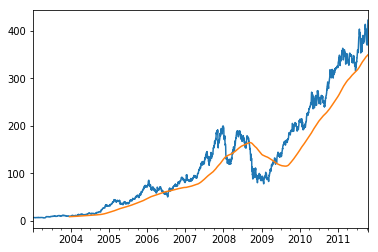

In [138]:
close_px.AAPL.plot()
close_px.AAPL.rolling(250).mean().plot()

In [139]:
plt.figure()

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

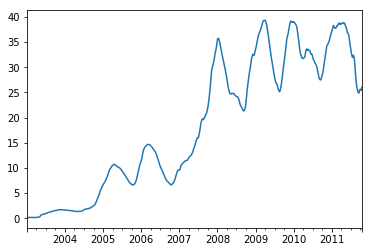

In [140]:
appl_std250 = close_px.AAPL.rolling(250, min_periods=10).std()
appl_std250[5:12]
appl_std250.plot()

In [141]:
expanding_mean = appl_std250.expanding().mean()

In [142]:
plt.figure()

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

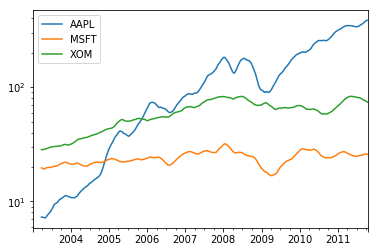

In [143]:
close_px.rolling(60).mean().plot(logy=True)

In [144]:
close_px.rolling('20D').mean()

,AAPL,MSFT,XOM
2003-01-02,7.400000,21.110000,29.220000
2003-01-03,7.425000,21.125000,29.230000
2003-01-06,7.433333,21.256667,29.473333
2003-01-07,7.432500,21.425000,29.342500
2003-01-08,7.402000,21.402000,29.240000
2003-01-09,7.391667,21.490000,29.273333
2003-01-10,7.387143,21.558571,29.238571
2003-01-13,7.378750,21.633750,29.197500
2003-01-14,7.370000,21.717778,29.194444
2003-01-15,7.355000,21.757000,29.152000


### Exponentially Weighted Functions

In [145]:
plt.figure()

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

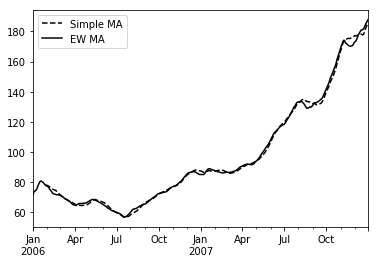

In [146]:
aapl_px = close_px.AAPL['2006':'2007']
ma60 = aapl_px.rolling(30, min_periods=20).mean()
ewma60 = aapl_px.ewm(span=30).mean()
ma60.plot(style='k--', label='Simple MA')
ewma60.plot(style='k-', label='EW MA')
plt.legend()

### Binary Moving Window Functions

In [147]:
plt.figure()

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

In [148]:
spx_px = close_px_all['SPX']
spx_rets = spx_px.pct_change()
returns = close_px.pct_change()

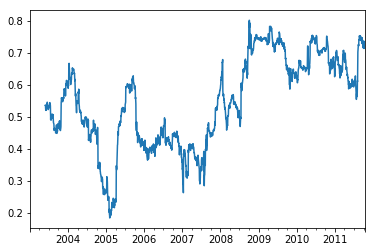

In [149]:
corr = returns.AAPL.rolling(125, min_periods=100).corr(spx_rets)
corr.plot()

In [150]:
plt.figure()

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

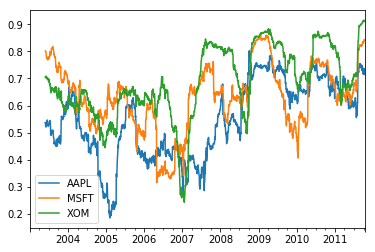

In [151]:
corr = returns.rolling(125, min_periods=100).corr(spx_rets)
corr.plot()

### User-Defined Moving Window Functions

In [152]:
plt.figure()

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

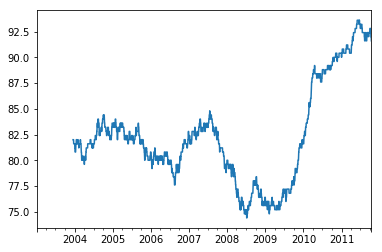

In [154]:
from scipy.stats import percentileofscore
score_at_2percent = lambda x: percentileofscore(x, 0.02)
result = returns.AAPL.rolling(250).apply(score_at_2percent, raw = True)
result.plot()

In [155]:
pd.options.display.max_rows = PREVIOUS_MAX_ROWS